# Aula 3: Tratamento e transformação dos dados

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

Nessa aula, vamos considerar dados com elementos duplicados ou faltantes e realizar a sua limpeza. Também vamos considerar métodos básicos de pré-processamento e transformação de dados.

Vamos ler um conjunto de dados com erros:

In [103]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. 
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Primeiramente, vamos remover os "NaN" (not a number, que representam valores desconhecidos) do arquivo, apagando as linhas que contém esse problema. Notem que algumas linhas serão removidas, tais como a 5 e 9.

In [104]:
# remove as linhas com NaN
data = data.dropna(axis=0) 
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada


Vamos remover as linhas duplicadas. Para isso, inicialmente verificamos se há a ocorrência dessas linhas.

In [105]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

0     False
1      True
2     False
3     False
4      True
6     False
7     False
8      True
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

Notem que indicamos nos dados originais, na última coluna, quais linhas estão duplicadas.

Para realizamos a remoção, usamos um método da biblioteca Pandas.

In [106]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


Compare essa tabela com a original (acima) e verifique se a remoção das linhas foi feita de forma correta. As linhas duplicadas são indicadas na última coluna.

Vamos remover as linhas que contenham "?" ou qualquer outro caracter que indique um erro ou entrada faltante.

Primeiramente, convertemos essas entradas para "NaN":

In [107]:
import numpy as np
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


A seguir, fazemos a remoção, como anteriormente.

In [108]:
# Remove as linhas com Nan
data = data.dropna(axis=0) #axis=0: remove as linhas,axis=1: remove as colunas
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


Desse forma, temos um conjunto de dados sem erros e entradas duplicadas. É fundamental realizar essas operações em qualquer conjunto de dados antes de aplicarmos os métodos de aprendizado de máquina e estatística.

Podemos também remover determinadas linhas e colunas dos dados. Para remover a segunda e quarta colunas:

In [109]:
print("Atributos atuais:",data.columns)
# Remove as linhas especificadas
data = data.drop(data.columns[[1, 3]], axis=1)
data.head(25)

Atributos atuais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,petal_length,species
0,5.1,1.4,duplicada
3,4.7,1.3,setosa
6,5,1.4,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa


Para remover a primeira e terceira linhas:

In [110]:
data = data.drop(data.index[[0, 2]], axis=0)
data.head(25)

,sepal_length,petal_length,species
3,4.7,1.3,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa
18,4.3,1.1,setosa
19,5.8,1.2,setosa


## Substituição de valores ausentes

Em muitas siutações, a matriz de atributos pode conter valores ausentes. Nesse caso, podemos usar diferentes métodos para substituir tais valores, como preenche-los com valores médios ou medianas.

Vamos ler os dados novamente:

In [111]:
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print(data.shape)
data.head(25)

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Vamos substituir os valores com 'NaN' e '?' pelos valores médios dos atributos. Primeiramente, mudamos as entradas '?' para 'NaN', como foi feito anteriormente.

In [112]:
import numpy as np
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


A seguir, inserimos a média de cada atributo nas entradas com valores 'NaN'.

In [113]:
# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float) 
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
averages = np.nanmean(X, axis = 0) 
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(X)

[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        

Assim como inserimos a média, poderíamos inserir a mediana ou qualquer outro valor.

## Normalização e padronização

Vamos ler os dados:

In [114]:
# CSV file
data = pd.read_csv('data/iris.csv', header=(0))
print(data.shape)
data.head(25)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Para normalizar os dados no intervalo [0,1]:

In [115]:
from sklearn.preprocessing import MinMaxScaler
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_pad = scaler.fit_transform(X)
print(X_pad)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

Ou seja, o máximo e mínimo do novo conjunto de dados:

In [116]:
print('Mínimo dos atributos:', np.amin(X_pad, axis=0))
print('Máximo dos atributos:', np.amax(X_pad, axis=0))

Mínimo dos atributos: [0. 0. 0. 0.]
Máximo dos atributos: [1. 1. 1. 1.]


Para realizarmos a padronização dos dados, de forma que os atributos apresentem média igual a zero e variância igual a 1, o procedimento é parecido.

In [117]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Vamos verificar se cada coluna apresenta média igual a zero e desvio padrão igual a um.

In [118]:
for i in np.arange(0,rescaledX.shape[1]):
    print('Media da coluna', i, 'é igual a: ', np.mean(rescaledX[:,i]))
    print('Desvio padrão da coluna', i, 'é igual a: ', np.std(rescaledX[:,i]),'\n')

Media da coluna 0 é igual a:  -4.736951571734001e-16
Desvio padrão da coluna 0 é igual a:  1.0 

Media da coluna 1 é igual a:  -6.631732200427602e-16
Desvio padrão da coluna 1 é igual a:  0.9999999999999999 

Media da coluna 2 é igual a:  3.315866100213801e-16
Desvio padrão da coluna 2 é igual a:  0.9999999999999998 

Media da coluna 3 é igual a:  -2.842170943040401e-16
Desvio padrão da coluna 3 é igual a:  1.0 



## Conversão de variáveis nominais em inteiros

Quando temos dados nominais e ordinais, podemos convertê-los para variáveis numéricas. Vamos fazer isso com as classes dos dados, mudando os valores nominais para inteiros.

In [119]:
# leitura dos dados
data = pd.read_csv('data/iris.csv', header=(0))
print('Número de linhas e colunas:', data.shape)
# mostramos a última coluna
print('Coluna com as classes:\n', data[data.columns[-1]])

Número de linhas e colunas: (150, 5)
Coluna com as classes:
 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [120]:
# armazena o nome das classes
classes = np.unique(data[data.columns[-1]])
number = 0 # valor que será usado para representar a clases
for i in classes:
    data = data.replace(i, number) # substitui cada valor da classe por number
    number = number + 1
print('Novos dados:')
print(data[data.columns[-1]])

Novos dados:
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


Esse mesmo procedimento pode ser usado em qualquer uma das colunas da matriz de atributos.

## One-hot encoding

Quando temos variáveis nominais e precisamos transformá-las para numéricas, uma maneira simples é usar o método one-hot encoding. 

In [121]:
import pandas as pd

# cria um dataframe do Pandas
df = pd.DataFrame({
          'A':['a','b','a', 'c', 'a', 'b'],
        })
df.head()

,A
0,a
1,b
2,a
3,c
4,a


Usando one-hot enconding, obtemos:

In [122]:
df = pd.get_dummies(df)
df.head()

,A_a,A_b,A_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


Note que foi usado um código binário para cada valor nominal.

## Dados desbalanceados

Muitas vezes, o número de observações difere em cada classe, de modo que os dados são desbalanceados. Podemos verificar o número de elementos em cada classe criando um histograma.

In [123]:
data = pd.read_csv('data/Vehicle.csv', header=(0))
data.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [124]:
classes = data[data.columns[-1]]
print(classes)

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: Class, Length: 846, dtype: object


O histograma do número de elementos em cada classe:

In [125]:
# armazena os nomes das classes
cl = np.unique(classes)
# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)

[218. 212. 217. 199.]


Em um gráfico de barras:

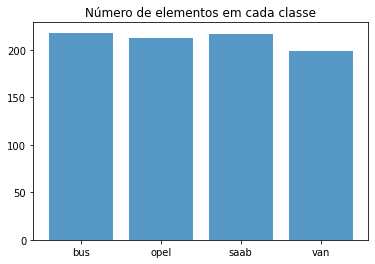

In [126]:
# número de classes
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
# mostra o nome das classes ao invés dos números
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Podemos redistribuir os dados de modo que cada classes contenha o mesmo número de elementos.

Vamos balancear os dados de forma que cada classe contenha $N$ elementos. Escolhermos $N$ elementos de forma aleatória, sem reposição, de cada classe.

In [127]:
N = 3
# classes
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')
print(Xnew)

Dados obtidos a partir da amostragem
[[[87 44 70 179 75 6 146 45 19 141 167 326 178 69 6 1 194 201 'bus']
  [81 45 68 154 69 22 151 45 19 147 186 335 186 88 1 10 180 185 'bus']
  [108 56 102 246 75 6 239 28 26 167 264 855 228 82 9 13 186 185 'bus']]

 [[97 48 105 212 64 11 201 33 23 155 212 602 162 64 2 7 193 202 'opel']
  [89 36 69 142 57 7 135 50 18 126 154 266 128 66 3 36 193 203 'opel']
  [100 58 109 230 70 11 226 30 25 182 234 752 207 72 0 13 187 198 'opel']]

 [[89 35 52 121 57 4 122 55 17 125 139 220 128 82 5 13 181 184 'saab']
  [109 53 109 221 69 12 221 31 25 169 226 712 212 72 13 28 188 201
   'saab']
  [91 39 72 133 55 7 146 46 19 132 170 314 149 77 9 18 184 189 'saab']]

 [[88 34 58 140 59 6 127 52 18 130 148 243 113 63 4 10 199 206 'van']
  [91 43 88 157 61 9 149 45 19 157 165 326 140 64 1 26 197 207 'van']
  [93 41 82 159 63 9 144 46 19 143 160 309 127 63 6 10 199 207 'van']]]


## Outliers - Box plot

Em muitos casos, temos a presença de outliers nos dados. Uma maneira simples de identificar outliers é criando um boxplot.

Lembrem-se, um boxplot:

<img src="https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png" style="height:300px"> 

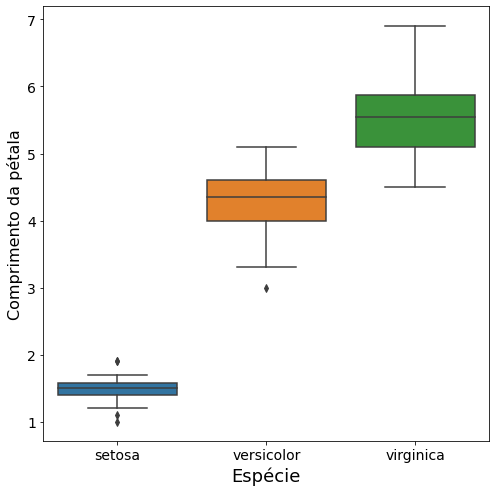

In [128]:
# biblioteca para mostrar os gráficos
import seaborn as sns
data = pd.read_csv('data/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
# mostra o boxplot
sns.boxplot(x="species", y="petal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Podemos ainda usar a distância interquantil (Q3 - Q1) para encontrar os outliers de uma forma simples. Vamos considerar um exemplo.

In [129]:
np.random.seed(101)
# geramos os dados de forma aleatória e colocamos em um dataframe
data = pd.DataFrame({'a': np.random.randint(1, 200, 20), 
                          'b': np.random.randint(1, 200, 20),
                          'c': np.random.randint(1, 200, 20)})

# geramos os outliers, aumentando em 10 vezes o valor dos atributos
data[data > 150] = data[data > 150]*10
# mostramos os dados
print (data)

       a     b     c
0     96   112   100
1     12   137    29
2     82   116    64
3     71  1580     8
4     64   116   139
5     88    60  1810
6     76  1630  1850
7    138    45   104
8     41    73    39
9    133    20    74
10    64   127  1810
11  1690   139   147
12    61    77    72
13  1930   108   104
14   111    88   144
15     6   129    45
16   141   106     1
17    41     9   117
18    50    63   107
19    84  1650   141


Visualizando os dados:

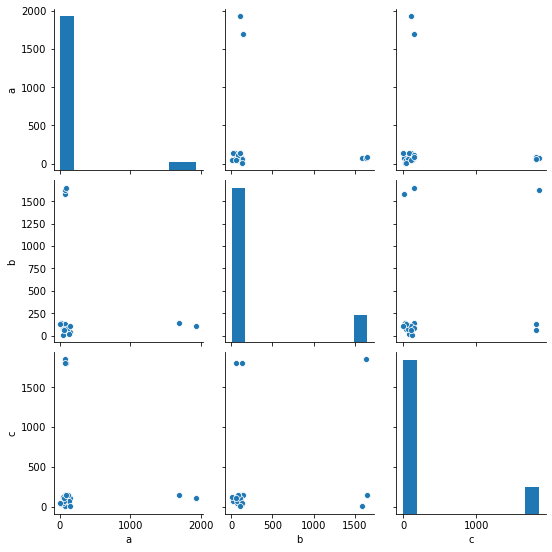

In [130]:
import seaborn as sns
sns.pairplot(data)
plt.show()

Para encontrarmos os outliers:

In [131]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))))

        a      b      c
0   False  False  False
1   False  False  False
2   False  False  False
3   False   True  False
4   False  False  False
5   False  False   True
6   False   True   True
7   False  False  False
8   False  False  False
9   False  False  False
10  False  False   True
11   True  False  False
12  False  False  False
13   True  False  False
14  False  False  False
15  False  False  False
16  False  False  False
17  False  False  False
18  False  False  False
19  False   True  False


Podemos dizer que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot. Ou seja, se o valor é menor do que (Q1 - 1.5 * IQR) ou maior do que (Q3 + 1.5 * IQR).
Outliers são indicados como True abaixo.

In [132]:
print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))#~is used to invert the answer

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19     True
dtype: bool


A partir dessa informação, podemos fazer a retirada dos outliers no dados originais.

## Análise dos componentes principais

Vamos ler os dados novamente.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV file
#data = pd.read_csv('data/Iris.csv', header=(0))
data = pd.read_csv('data/Vehicle.csv', header=(0))

classes = np.unique(data[data.columns[-1]])
print(data.shape)
list_labels = list(data.columns)
data.head(10)

(846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Vamos construir as variáveis $X$ e $Y$, sendo que $X$ representa os atributos e $Y$ as classes.

In [134]:
data = data.to_numpy() #valido apenas para a versao do Pandas maior do que 0.24.0
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Relizando a análise dos componentes principais:

In [136]:
from sklearn.decomposition import PCA
# seleciona os dois componentes principais
pca = PCA(n_components=2)
# calcula o PCA
pca_result = pca.fit_transform(X)

Vamos mostrar os dados projetados em duas dimensões:

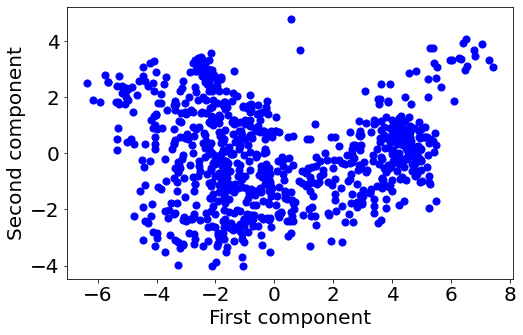

In [137]:
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0], pca_result[:,1], s=50, color = 'blue')
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Podemos colorir de acordo com as classes:

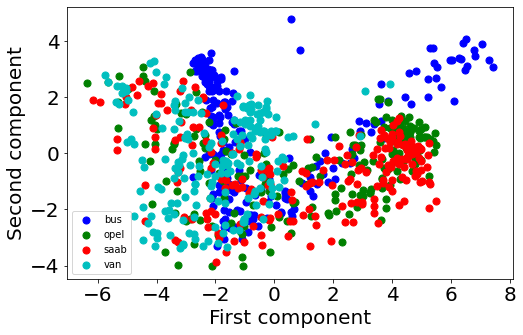

In [138]:
# define as cores possíveis
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    nodes = np.where(y == c)
    # mostra os dados,considerando uma cor para cada classe
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Para estimarmos o número de componentes para projetarmos os dados, podemos analisar como a variância muda de acordo com o número de componentes.

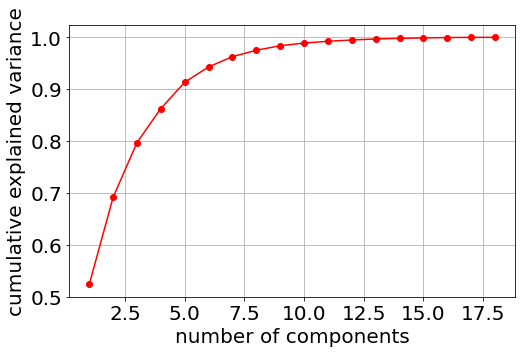

In [139]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

Logo, com duas dimensões, explicamos quase toda a variância nos dados.

## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Leia os dados com erro novamente (iris-with-errors), faça a limpeza e remova as duas últimas colunas.

In [140]:
# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(10)

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [141]:
# Substituindo Nan por um caracter desejado
data = data.replace('?', np.nan)
# Removando as linhas com os Nulos (NaN)
data = data.dropna(axis=0)
# Removendo as linhas duplicadas
data = data.drop_duplicates()

data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


In [142]:
# Removendo as 2 últimas colunas
print("Atributos atuais:",data.columns)
data = data.drop(data.columns[[3, 4]], axis=1) # axis = 1 = columns
print("Atributos reduzidos:",data.columns)
                              

Atributos atuais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Atributos reduzidos: Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')


2 - Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

In [143]:
# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
# Replacing '?' for NaN
data = data.replace('?', np.nan)

# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
print(X.shape)
X

(25, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [nan, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [nan, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, nan],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.4, 2.9, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, nan],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, nan, 1.7, 0.3],
       [nan, 3.8, 1.5, 0.3]])

In [144]:
# calculamos a mediana de cada atributo e armazenamos em um vetor
medians = np.nanmedian(X, axis = 0) 

# Usamos a função nanmean que calcula a média ignorando os Nan
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = medians[j] # insere a mediana
print(X)

[[5.1  3.5  1.4  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.2 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.4  2.9  1.4  0.2 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.2 ]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.45 1.7  0.3 ]
 [5.05 3.8  1.5  0.3 ]]


3 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [147]:
data = pd.read_csv('data/Iris.csv', header=(0))
classes = data[data.columns[-1]]
print(classes)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [149]:
# Histograma em gráfico de barras
cl = np.unique(classes)

# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)

[50. 50. 50.]


In [150]:
# Vamos balancear os dados de forma que cada classe contenha  𝑁  elementos. 
# Escolhemos 𝑁 elementos de forma aleatória, sem reposição, de cada classe.
N = 10
# classes
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')
print(Xnew)

Dados obtidos a partir da amostragem
[[[5.1 3.8 1.6 0.2 'setosa']
  [5.1 3.8 1.9 0.4 'setosa']
  [5.1 3.4 1.5 0.2 'setosa']
  [4.6 3.2 1.4 0.2 'setosa']
  [5.2 4.1 1.5 0.1 'setosa']
  [4.6 3.6 1.0 0.2 'setosa']
  [5.5 3.5 1.3 0.2 'setosa']
  [5.4 3.7 1.5 0.2 'setosa']
  [5.0 3.3 1.4 0.2 'setosa']
  [4.6 3.1 1.5 0.2 'setosa']]

 [[6.4 3.2 4.5 1.5 'versicolor']
  [6.1 2.8 4.0 1.3 'versicolor']
  [6.6 2.9 4.6 1.3 'versicolor']
  [5.6 3.0 4.5 1.5 'versicolor']
  [5.9 3.2 4.8 1.8 'versicolor']
  [6.1 3.0 4.6 1.4 'versicolor']
  [6.2 2.2 4.5 1.5 'versicolor']
  [6.7 3.1 4.4 1.4 'versicolor']
  [6.3 3.3 4.7 1.6 'versicolor']
  [5.5 2.6 4.4 1.2 'versicolor']]

 [[7.4 2.8 6.1 1.9 'virginica']
  [6.4 2.7 5.3 1.9 'virginica']
  [5.9 3.0 5.1 1.8 'virginica']
  [5.8 2.7 5.1 1.9 'virginica']
  [7.2 3.2 6.0 1.8 'virginica']
  [6.5 3.0 5.8 2.2 'virginica']
  [5.6 2.8 4.9 2.0 'virginica']
  [6.3 3.3 6.0 2.5 'virginica']
  [6.8 3.2 5.9 2.3 'virginica']
  [6.4 2.8 5.6 2.1 'virginica']]]


4 - Realize o PCA nos dados da base Iris.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV file
data = pd.read_csv('data/Iris.csv', header=(0))
# data = pd.read_csv('data/Vehicle.csv', header=(0))

classes = np.unique(data[data.columns[-1]])
print(data.shape)
list_labels = list(data.columns)
data.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [152]:
# Construindo as variáveis X (atributos) e y (classes)
data = data.to_numpy() #valido apenas para a versao do Pandas maior do que 0.24.0
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [153]:
# Padronizando
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [154]:
# Análise PCA em 2 dimensões
from sklearn.decomposition import PCA
# seleciona os dois componentes principais
pca = PCA(n_components=2)
# calcula o PCA
pca_result = pca.fit_transform(X)

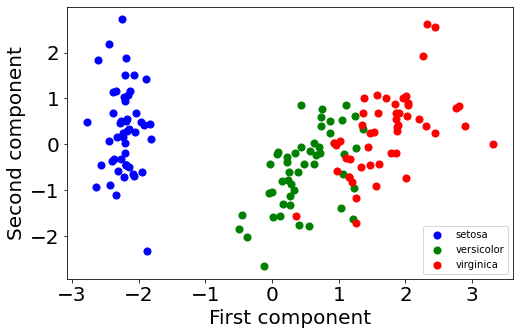

In [155]:
# Colorindo de acordo com as classes
# define as cores possíveis
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    nodes = np.where(y == c)
    # mostra os dados,considerando uma cor para cada classe
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

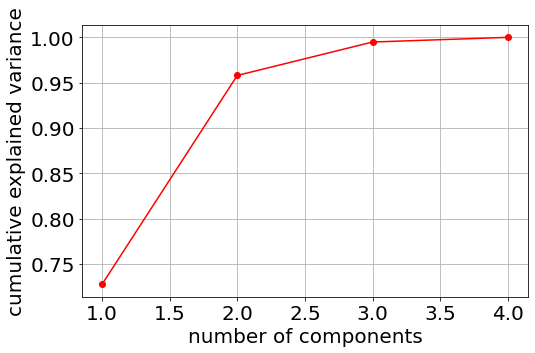

In [156]:
# Análise da variância de acordo com o número de componentes
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)